In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
final = pd.read_csv('final data-Malavika.csv')

In [2]:
final.head()

,STATE,Year,CO2,CH4,N2O,Fluorinated GHG,Incentives,Laws and Regulations,State Incentives,Utility/Private Incentives,Programs,State Hybrid Incentives,Ozone
0,AL,2012,84138381,701702,602778,264437.0,0,3,7,4,0,0,0.044215
1,AL,2013,83297945,594388,451420,274194.0,0,3,7,4,0,0,0.039733
2,AL,2014,84847355,634009,525399,312201.0,0,3,7,4,0,0,0.040936
3,AL,2015,82143007,611595,462661,263031.0,0,3,7,3,0,0,0.039063
4,AL,2016,75103394,550119,528136,302584.0,0,3,6,2,0,0,0.042845


In [3]:
final.info()
modified_final = pd.DataFrame(columns=['avgCO2','avgCH4','avgN2O','avgOzone'])
modified_final = final.groupby('STATE')['CO2','CH4','N2O','Ozone'].mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STATE                       350 non-null    object 
 1   Year                        350 non-null    int64  
 2   CO2                         350 non-null    int64  
 3   CH4                         350 non-null    int64  
 4   N2O                         350 non-null    int64  
 5   Fluorinated GHG             112 non-null    float64
 6   Incentives                  350 non-null    int64  
 7   Laws and Regulations        350 non-null    int64  
 8   State Incentives            350 non-null    int64  
 9   Utility/Private Incentives  350 non-null    int64  
 10  Programs                    350 non-null    int64  
 11  State Hybrid Incentives     350 non-null    int64  
 12  Ozone                       350 non-null    float64
dtypes: float64(2), int64(10), object(1)

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
modified_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, AK to WY
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     49 non-null     float64
 1   CH4     49 non-null     float64
 2   N2O     49 non-null     float64
 3   Ozone   49 non-null     float64
dtypes: float64(4)
memory usage: 1.9+ KB


In [5]:
modified_final.head()

,CO2,CH4,N2O,Ozone
STATE,,,,
AK,1.497560e+07,1.990749e+05,14618.714286,0.027972
AL,7.890785e+07,6.005120e+05,479080.857143,0.040935
AR,3.934708e+07,2.800404e+05,560996.571429,0.041204
AZ,5.410111e+07,2.424970e+05,584756.142857,0.048495
CA,9.227830e+07,1.910732e+06,128908.285714,0.044069


In [6]:
final.isnull().sum(axis = 0)

STATE                           0
Year                            0
CO2                             0
CH4                             0
N2O                             0
Fluorinated GHG               238
Incentives                      0
Laws and Regulations            0
State Incentives                0
Utility/Private Incentives      0
Programs                        0
State Hybrid Incentives         0
Ozone                           0
dtype: int64

In [7]:
mean = final['Ozone'].mean()
final['Ozone'] = final['Ozone'].fillna(mean)

In [8]:
final.isnull().sum(axis = 0)

STATE                           0
Year                            0
CO2                             0
CH4                             0
N2O                             0
Fluorinated GHG               238
Incentives                      0
Laws and Regulations            0
State Incentives                0
Utility/Private Incentives      0
Programs                        0
State Hybrid Incentives         0
Ozone                           0
dtype: int64

In [9]:
final.pivot_table(index=['Ozone'], aggfunc='size')

Ozone
0.025783    1
0.026813    1
0.027041    1
0.027240    1
0.027371    1
           ..
0.052429    1
0.053415    1
0.054178    1
0.056174    1
0.057066    1
Length: 343, dtype: int64

In [10]:
final.pivot_table(index=['N2O'], aggfunc='size')

N2O
21          2
22          1
76          2
124         1
1461        1
           ..
4994554     1
5739976     1
7524030     1
7748239     1
10807191    1
Length: 340, dtype: int64

In [11]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STATE                       350 non-null    object 
 1   Year                        350 non-null    int64  
 2   CO2                         350 non-null    int64  
 3   CH4                         350 non-null    int64  
 4   N2O                         350 non-null    int64  
 5   Fluorinated GHG             112 non-null    float64
 6   Incentives                  350 non-null    int64  
 7   Laws and Regulations        350 non-null    int64  
 8   State Incentives            350 non-null    int64  
 9   Utility/Private Incentives  350 non-null    int64  
 10  Programs                    350 non-null    int64  
 11  State Hybrid Incentives     350 non-null    int64  
 12  Ozone                       350 non-null    float64
dtypes: float64(2), int64(10), object(1)

In [12]:
sum(final.duplicated())

7

In [13]:
model = KMeans(n_clusters=3)
model.fit(final[['CO2','Ozone']]) 

KMeans(n_clusters=3)

In [14]:
labels = model.predict(final[['CO2','Ozone']])

In [15]:
print(labels)

[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1]


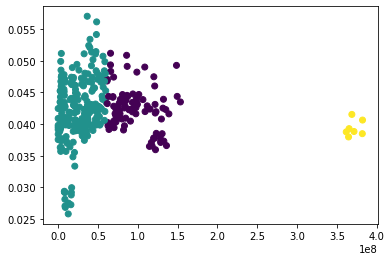

In [16]:
xs = final['CO2'] 
ys = final['Ozone']
plt.scatter(xs, ys, c=labels)
plt.show()

In [17]:
model1 = KMeans(n_clusters=3)
model1.fit(modified_final[['CO2','Ozone','CH4','N2O']]) 
labels1 = model1.predict(modified_final[['CO2','Ozone','CH4','N2O']])
modified_final['clusters'] = labels1
print(labels1)

[0 2 0 0 2 0 0 0 2 2 0 0 0 2 2 0 2 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 2
 0 0 0 0 1 0 0 0 0 0 2 0]


In [18]:
modified_final.head()

,CO2,CH4,N2O,Ozone,clusters
STATE,,,,,
AK,1.497560e+07,1.990749e+05,14618.714286,0.027972,0
AL,7.890785e+07,6.005120e+05,479080.857143,0.040935,2
AR,3.934708e+07,2.800404e+05,560996.571429,0.041204,0
AZ,5.410111e+07,2.424970e+05,584756.142857,0.048495,0
CA,9.227830e+07,1.910732e+06,128908.285714,0.044069,2


In [19]:
import seaborn as sns
reduced_data = PCA(n_components=3).fit_transform(modified_final)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2','pca3'])
results.head()


,pca1,pca2,pca3
0,-3.789763e+07,-5.772528e+05,-19879.418809
1,2.603092e+07,-1.494489e+06,70865.677582
2,-1.352557e+07,-9.065668e+05,390444.310696
3,1.224154e+06,-1.264830e+06,362306.952321
4,3.942158e+07,-6.067600e+05,-643594.868257


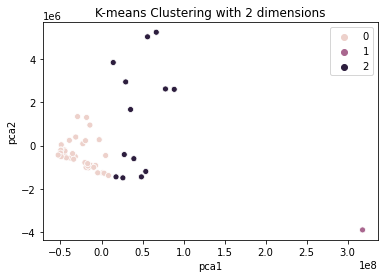

In [20]:
sns.scatterplot(x="pca1", y="pca2", hue=labels1, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

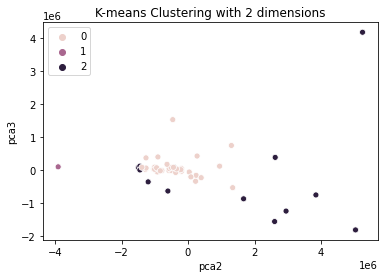

In [21]:
sns.scatterplot(x="pca2", y="pca3", hue=labels1, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()